### About the company
Cyclistic, a fictional company, launched as a bike-share oﬀering. Cyclistic sets itself apart by also oﬀering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. Cyclistic has two kind of customers, cyclistic members and casual riders involves single-ride passes and full-day passes.<br/>
As the growth of the company, cyclistic’s ﬁnance analysts have concluded that annual members are much more proﬁtable than casual riders.  Although the pricing ﬂexibility helps cyclistic attract more customers, Moreno as the director of marketing and manager, believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

### Business task
Design marketing strategies aimed at converting casual riders into annual members.

**Primary stakeholder:**<br/>
Cyclistic executive team<br/>
**Secondary stakeholders:**<br/>
Lily Moreno<br/>
Cyclistic marketing analytics team

### Question to answer
1. How do annual members and casual riders use Cyclistic bikes diﬀerently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to inﬂuence casual riders to become members? 

In [1]:
# Load packages
library(tidyverse)
library(lubridate)
library(ggplot2)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



**STEP 1: DATA COLLECTION**

In [2]:
# Import data
q2_2019 <- read_csv("Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("Divvy_Trips_2020_Q1.csv")

Parsed with column specification:
cols(
  `01 - Rental Details Rental ID` = col_double(),
  `01 - Rental Details Local Start Time` = col_datetime(format = ""),
  `01 - Rental Details Local End Time` = col_datetime(format = ""),
  `01 - Rental Details Bike ID` = col_double(),
  `01 - Rental Details Duration In Seconds Uncapped` = col_number(),
  `03 - Rental Start Station ID` = col_double(),
  `03 - Rental Start Station Name` = col_character(),
  `02 - Rental End Station ID` = col_double(),
  `02 - Rental End Station Name` = col_character(),
  `User Type` = col_character(),
  `Member Gender` = col_character(),
  `05 - Member Details Member Birthday Year` = col_double()
)
Parsed with column specification:
cols(
  trip_id = col_double(),
  start_time = col_datetime(format = ""),
  end_time = col_datetime(format = ""),
  bikeid = col_double(),
  tripduration = col_number(),
  from_station_id = col_double(),
  from_station_name = col_character(),
  to_station_id = col_double(),
  to_station

**STEP 2: DATA WRANGLING**

In [3]:
# Compare column names of each files
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)
colnames(q1_2020)

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

Before analysis process, each column names should be matched perfectly in order to join them into a single file.

In [4]:
# Rename columns to make them consisent with q1_2020
q2_2019 <- rename(q2_2019, ride_id = "01 - Rental Details Rental ID",
                   rideable_type = "01 - Rental Details Bike ID",
                   started_at = "01 - Rental Details Local Start Time",
                   ended_at = "01 - Rental Details Local End Time",
                   start_station_name = "03 - Rental Start Station Name",
                   start_station_id = "03 - Rental Start Station ID",
                   end_station_name = "02 - Rental End Station Name",
                   end_station_id = "02 - Rental End Station ID",
                   member_casual = "User Type")
q3_2019 <- rename(q3_2019,ride_id = trip_id,
                   rideable_type = bikeid,
                   started_at = start_time,
                   ended_at = end_time,
                   start_station_name = from_station_name,
                   start_station_id = from_station_id,
                   end_station_name = to_station_name,
                   end_station_id = to_station_id,
                   member_casual = usertype)
q4_2019 <- rename(q4_2019,ride_id = trip_id,
                   rideable_type = bikeid,
                   started_at = start_time,
                   ended_at = end_time,
                   start_station_name = from_station_name,
                   start_station_id = from_station_id,
                   end_station_name = to_station_name,
                   end_station_id = to_station_id,
                   member_casual = usertype)

In [5]:
# Inspect the dataframes and look for incongruencies
str(q1_2020)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	426887 obs. of  13 variables:
 $ ride_id           : chr  "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct, format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct, format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr  "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num  239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr  "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num  326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num  42 42 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.6 -87.6 ...
 $ end_lat  

In [6]:
str(q2_2019)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	1108163 obs. of  12 variables:
 $ ride_id                                         : num  22178529 22178530 22178531 22178532 22178533 ...
 $ started_at                                      : POSIXct, format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at                                        : POSIXct, format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type                                   : num  6251 6226 5649 4151 3270 ...
 $ 01 - Rental Details Duration In Seconds Uncapped: num  446 1048 252 357 1007 ...
 $ start_station_id                                : num  81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name                              : chr  "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id                                  : num  56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name                   

In [7]:
str(q3_2019)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	1640718 obs. of  12 variables:
 $ ride_id           : num  23479388 23479389 23479390 23479391 23479392 ...
 $ started_at        : POSIXct, format: "2019-07-01 00:00:27" "2019-07-01 00:01:16" ...
 $ ended_at          : POSIXct, format: "2019-07-01 00:20:41" "2019-07-01 00:18:44" ...
 $ rideable_type     : num  3591 5353 6180 5540 6014 ...
 $ tripduration      : num  1214 1048 1554 1503 1213 ...
 $ start_station_id  : num  117 381 313 313 168 300 168 313 43 43 ...
 $ start_station_name: chr  "Wilton Ave & Belmont Ave" "Western Ave & Monroe St" "Lakeview Ave & Fullerton Pkwy" "Lakeview Ave & Fullerton Pkwy" ...
 $ end_station_id    : num  497 203 144 144 62 232 62 144 195 195 ...
 $ end_station_name  : chr  "Kimball Ave & Belmont Ave" "Western Ave & 21st St" "Larrabee St & Webster Ave" "Larrabee St & Webster Ave" ...
 $ member_casual     : chr  "Subscriber" "Customer" "Customer" "Customer" ...
 $ gender            : chr  "Male" NA 

In [8]:
str(q4_2019)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	704054 obs. of  12 variables:
 $ ride_id           : num  25223640 25223641 25223642 25223643 25223644 ...
 $ started_at        : POSIXct, format: "2019-10-01 00:01:39" "2019-10-01 00:02:16" ...
 $ ended_at          : POSIXct, format: "2019-10-01 00:17:20" "2019-10-01 00:06:34" ...
 $ rideable_type     : num  2215 6328 3003 3275 5294 ...
 $ tripduration      : num  940 258 850 2350 1867 ...
 $ start_station_id  : num  20 19 84 313 210 156 84 156 156 336 ...
 $ start_station_name: chr  "Sheffield Ave & Kingsbury St" "Throop (Loomis) St & Taylor St" "Milwaukee Ave & Grand Ave" "Lakeview Ave & Fullerton Pkwy" ...
 $ end_station_id    : num  309 241 199 290 382 226 142 463 463 336 ...
 $ end_station_name  : chr  "Leavitt St & Armitage Ave" "Morgan St & Polk St" "Wabash Ave & Grand Ave" "Kedzie Ave & Palmer Ct" ...
 $ member_casual     : chr  "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...
 $ gender            : chr  "Male" "M

In the q1_2020, most of ride_id is combination of numbers and letters and rideable_type is type of the ride which written with letter. We need to transform the other files data types to make them aligned with q1_2020.

In [9]:
# Convert ride_id and rideable_type to character
q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id),
                   rideable_type = as.character(rideable_type))
q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id),
                   rideable_type = as.character(rideable_type))
q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id),
                   rideable_type = as.character(rideable_type))

**STEP 3: DATA MERGING**

In [10]:
# Join individual quarter's dataframes into a single dataframe
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

In [11]:
# Remove unused columns
all_trips <- all_trips %>%  
select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,
            "01 - Rental Details Duration In Seconds Uncapped",
            "05 - Member Details Member Birthday Year", "Member Gender", "tripduration"))

**STEP 4: DATA CLEANING**

In [12]:
# Inspect the new table
colnames(all_trips)

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

In [13]:
nrow(all_trips)

[1] 3879822

In [14]:
dim(all_trips)

[1] 3879822       9

In [15]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber


In [16]:
str(all_trips)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	3879822 obs. of  9 variables:
 $ ride_id           : chr  "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct, format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct, format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr  "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num  81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr  "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num  56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr  "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr  "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


In [17]:
summary(all_trips)

   ride_id            started_at                     ended_at                  
 Length:3879822     Min.   :2019-04-01 00:02:22   Min.   :2019-04-01 00:09:48  
 Class :character   1st Qu.:2019-06-23 07:49:09   1st Qu.:2019-06-23 08:20:27  
 Mode  :character   Median :2019-08-14 17:43:38   Median :2019-08-14 18:02:04  
                    Mean   :2019-08-26 00:49:59   Mean   :2019-08-26 01:14:37  
                    3rd Qu.:2019-10-12 12:10:21   3rd Qu.:2019-10-12 12:36:16  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
                                                                               
 rideable_type      start_station_id start_station_name end_station_id 
 Length:3879822     Min.   :  1.0    Length:3879822     Min.   :  1.0  
 Class :character   1st Qu.: 77.0    Class :character   1st Qu.: 77.0  
 Mode  :character   Median :174.0    Mode  :character   Median :174.0  
                    Mean   :202.9                       Mean   :203.8  


In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels.

We can replace "Subscriber" with "member" and "Customer" with "casual" to make them consistent with the new format.

In [18]:
# Inspect total number of each category
table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480     857474     378407    2595461 

In [19]:
# Reassign to the desired values to match with q1_2020
all_trips <-  all_trips %>% 
mutate(member_casual = recode(member_casual
                           ,"Subscriber" = "member"
                           ,"Customer" = "casual"))

In [20]:
# Check the result of data cleaning
table(all_trips$member_casual)


 casual  member 
 905954 2973868 

**STEP 5: ADD DATA**

To answer the first question, we need to aggregate the ride data for each month, day, or year.

In [21]:
# Add columns that list the date, month, day, and year of each ride
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

We don't have column that shows trip duration of each ride. But from the data, we can calculate the length of each ride by subtracting the column “started_at” from the column “ended_at” and named as “ride_length”.

In [22]:
# Create a column called “ride_length”
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

In [23]:
# Inspect the structure of the columns
str(all_trips)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	3879822 obs. of  15 variables:
 $ ride_id           : chr  "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct, format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct, format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr  "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num  81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr  "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num  56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr  "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr  "member" "member" "member" "member" ...
 $ date              : Date, format: "2019-04-01" "2019-04-01" ...
 $ month             : chr  "04" "04" "04" "04" ...
 $ d

In [24]:
# Convert "ride_length" from factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative (due to start_at is greater than ended_at). We can use OR operator "|" and NOT operator "!" to remove those data. Then we will create a new version of the data frame (v2) since data is being removed.

In [25]:
# Remove "bad" data
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

In [26]:
head(all_trips_v2)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,month,day,year,day_of_week,ride_length
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,04,01,2019,Monday,446
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,04,01,2019,Monday,1048
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,04,01,2019,Monday,252
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,04,01,2019,Monday,357
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,04,01,2019,Monday,1007
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,member,2019-04-01,04,01,2019,Monday,257


**STEP 6: CONDUCT DESCRIPTIVE ANALYSIS**

In [27]:
# Descriptive analysis on ride_length (note that all figures are in seconds)
summary(all_trips_v2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     412     712    1479    1289 9387024 

In [28]:
# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
casual,3552.7502
member,850.0662


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,1546
member,589


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,9387024
member,9056634


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,2
member,1


In [29]:
# Aggregate the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
casual,Friday,3773.8351
member,Friday,824.5305
casual,Monday,3372.2869
member,Monday,842.5726
casual,Saturday,3331.9138
member,Saturday,968.9337
casual,Sunday,3581.4054
member,Sunday,919.9746
casual,Thursday,3682.9847
member,Thursday,823.9278


In [30]:
# Sort "day_of_week" start from Sunday
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week,
                                    levels=c("Sunday", "Monday", "Tuesday",
                                             "Wednesday", "Thursday", "Friday", "Saturday"))

In [31]:
# Check the result
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
casual,Sunday,3581.4054
member,Sunday,919.9746
casual,Monday,3372.2869
member,Monday,842.5726
casual,Tuesday,3596.3599
member,Tuesday,826.1427
casual,Wednesday,3718.6619
member,Wednesday,823.9996
casual,Thursday,3682.9847
member,Thursday,823.9278


In [32]:
# Analyze ridership data by type and weekday
all_trips_v2 %>% 
mutate(weekday = wday(started_at, label = TRUE)) %>% 
group_by(member_casual, weekday) %>%
summarise(number_of_rides = n(),
          average_duration = mean(ride_length)) %>%
arrange(member_casual, weekday)

member_casual,weekday,number_of_rides,average_duration
casual,Sun,181293,3581.4054
casual,Mon,103296,3372.2869
casual,Tue,90510,3596.3599
casual,Wed,92457,3718.6619
casual,Thu,102679,3682.9847
casual,Fri,122404,3773.8351
casual,Sat,209543,3331.9138
member,Sun,267965,919.9746
member,Mon,472196,842.5726
member,Tue,508445,826.1427


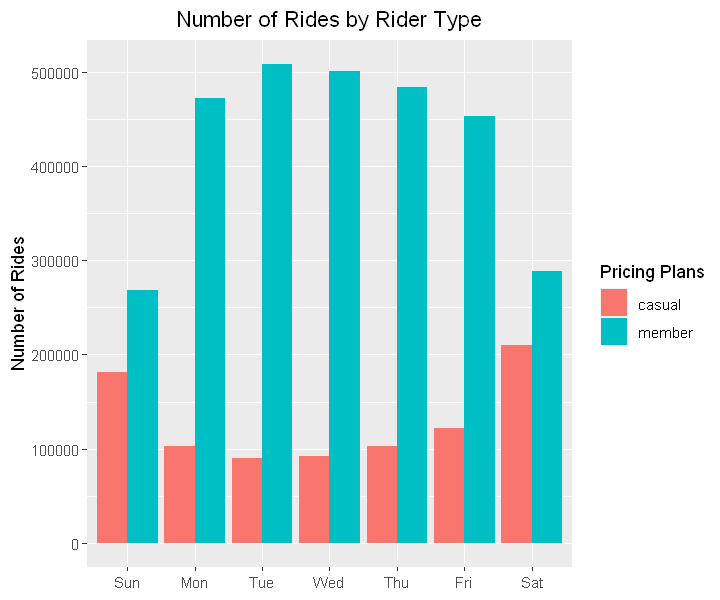

In [33]:
# Visualize the number of rides by rider type
options(repr.plot.width = 6, repr.plot.height = 5)
all_trips_v2 %>% 
mutate(weekday = wday(started_at, label = TRUE)) %>% 
group_by(member_casual, weekday) %>% 
summarise(number_of_rides = n(),
          average_duration = mean(ride_length)) %>% 
arrange(member_casual, weekday)  %>% 
ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
scale_y_continuous(labels = function(y) format(y, scientific = FALSE)) +
geom_col(position = "dodge") +
labs(title="Number of Rides by Rider Type", y = "Number of Rides") +
scale_fill_discrete(name = "Pricing Plans") +
theme(plot.title=element_text(hjust=0.5, size=13),
      axis.title.x = element_blank())

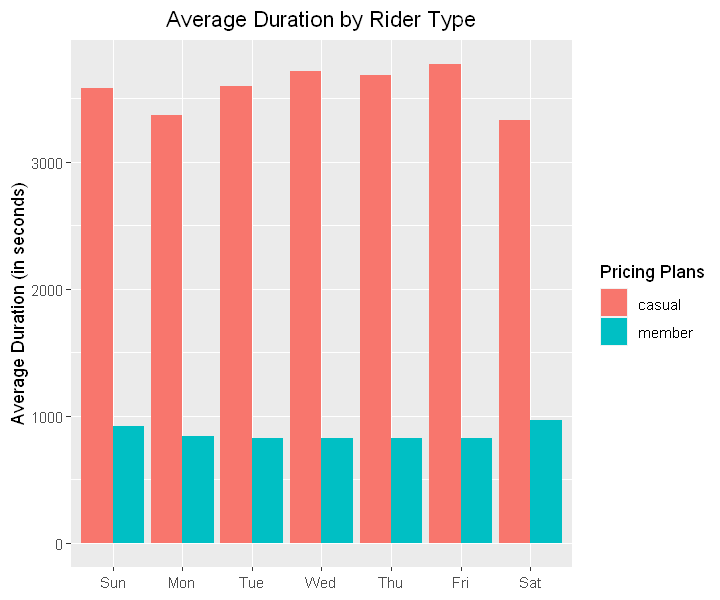

In [34]:
# Create a visualization for average duration
all_trips_v2 %>% 
mutate(weekday = wday(started_at, label = TRUE)) %>% 
group_by(member_casual, weekday) %>% 
summarise(number_of_rides = n(),
          average_duration = mean(ride_length)) %>% 
arrange(member_casual, weekday)  %>% 
ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
geom_col(position = "dodge") +
labs(title="Average Duration by Rider Type", y = "Average Duration (in seconds)") +
scale_fill_discrete(name = "Pricing Plans") +
theme(plot.title=element_text(hjust=0.5, size=13),
      axis.title.x = element_blank())

In [35]:
# Visualize number of rides for each month
all_trips_v2$year_month <- format(as.Date(all_trips_v2$date), "%b %Y")
head(all_trips_v2)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,month,day,year,day_of_week,ride_length,year_month
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,04,01,2019,Monday,446,Apr 2019
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,04,01,2019,Monday,1048,Apr 2019
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,04,01,2019,Monday,252,Apr 2019
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,04,01,2019,Monday,357,Apr 2019
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,04,01,2019,Monday,1007,Apr 2019
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,member,2019-04-01,04,01,2019,Monday,257,Apr 2019


In [36]:
all_trips_v2$year_month <- ordered(all_trips_v2$year_month,
                                    levels=c("Apr 2019", "May 2019", "Jun 2019", "Jul 2019", "Aug 2019", "Sep 2019", "Oct 2019",
                                             "Nov 2019", "Dec 2019", "Jan 2020", "Feb 2020", "Mar 2020"))

In [37]:
all_trips_v2 %>% 
group_by(year_month, member_casual) %>% 
summarise(number_of_rides = n())  %>% 
arrange(member_casual, year_month)

year_month,member_casual,number_of_rides
Apr 2019,casual,47744
May 2019,casual,81624
Jun 2019,casual,130218
Jul 2019,casual,175632
Aug 2019,casual,186889
Sep 2019,casual,129173
Oct 2019,casual,71035
Nov 2019,casual,18723
Dec 2019,casual,16430
Jan 2020,casual,7785


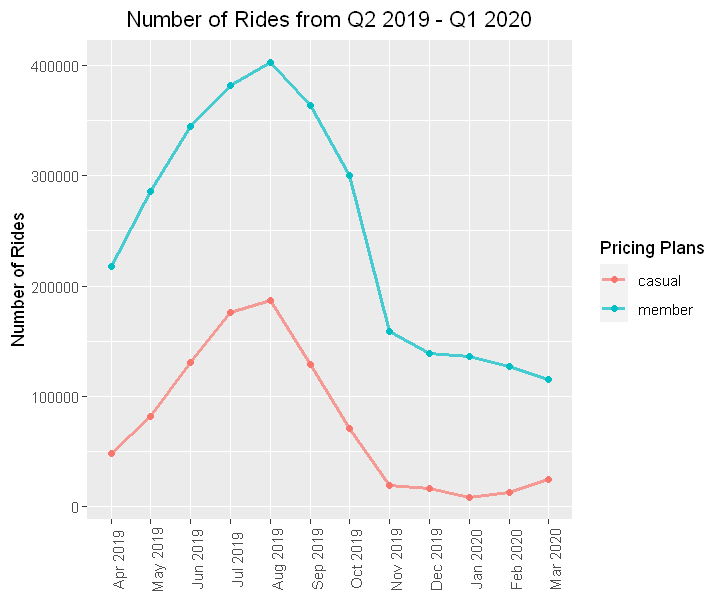

In [38]:
all_trips_v2 %>% 
group_by(year_month, member_casual) %>% 
summarise(number_of_rides = n())  %>% 
arrange(member_casual, year_month) %>% 
ggplot(aes(x = year_month, y = number_of_rides, colour = member_casual, group = member_casual)) +
scale_y_continuous(labels = function(y) format(y, scientific = FALSE)) +
                   geom_line(linetype="solid", size=1, alpha=0.7) +
                   geom_point() +
labs(title="Number of Rides from Q2 2019 - Q1 2020", y = "Number of Rides", colour = "Pricing Plans") +
theme(plot.title=element_text(hjust=0.5, size=13),
      axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 90))

**What insights these data tell us about?**
1. Currently, number of Cyclistic members is greater than casual riders.
2. On the other side, the average duration of casual riders is greater than Cyclistic members. It might be from tendency of the users to ride for leisure.
3. Number of rides peak in July - August for casual and member, at the moment of Summer season. But the trend tends to down as it enter September.
4. December through March experince low number of rides due to Winter season.

**STEP 7: EXPORT SUMMARY FILE**

In [39]:
# Create a csv file that we will visualize in Excel, Tableau, or presentation software
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = 'C:/Users/jundi/Desktop/csv_1/avg_ride_length.csv')